<a href="https://colab.research.google.com/github/KiranAI887/Calories-Burnt-Prediction/blob/main/Project15_Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
df1 = pd.read_csv("/content/calories.csv")

In [ ]:
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
df2 = pd.read_csv("/content/exercise.csv")

In [ ]:
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# combining the two dataframes


In [ ]:
df = pd.concat([df1['Calories'],df2],axis=1)

In [ ]:
df.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
df.shape

(15000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   User_ID     15000 non-null  int64  
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

,0
Calories,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
df.describe()

,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

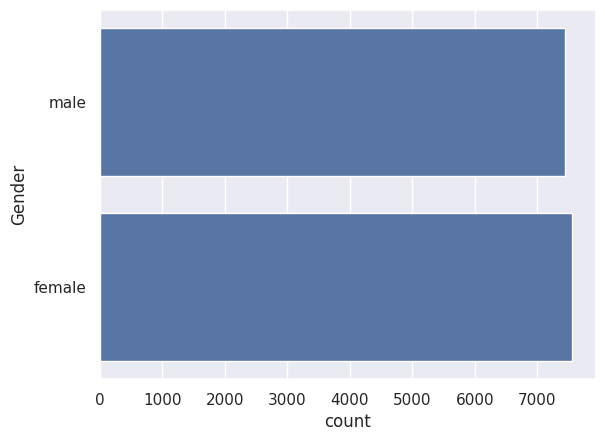

In [ ]:
# plotting the gender coloumn in count plot
sns.countplot(df['Gender'])


<ipython-input-16-e846f249f5ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

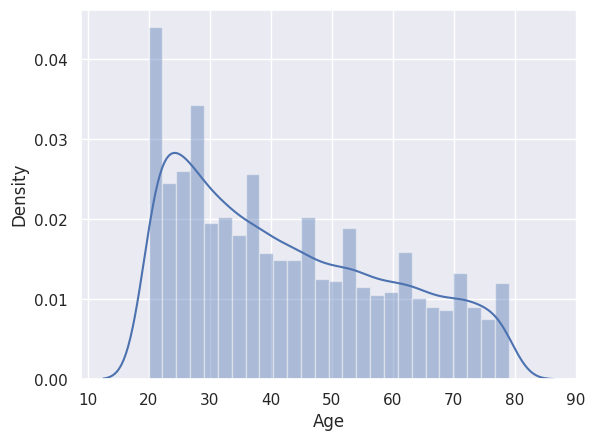

In [ ]:
# finding the distribution of "Age" coloumn
sns.distplot(df['Age'])

<ipython-input-17-a475bc9218e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

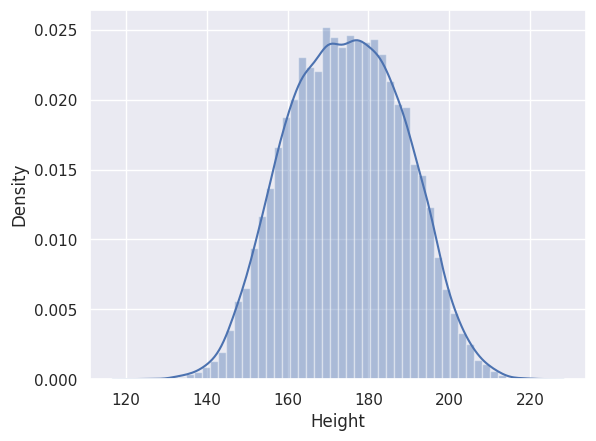

In [ ]:
# finding the distribution of "Height" coloumn
sns.distplot(df['Height'])

<ipython-input-18-7c4fe3fbaa8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

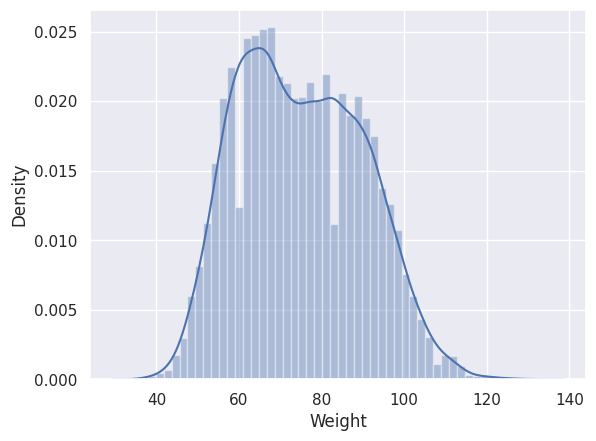

In [ ]:
# finding the distribution of "Weight" coloumn
sns.distplot(df['Weight'])

In [ ]:
#Finding the correlation in the dataset

In [ ]:
correlation = df.corr(numeric_only=True)

<Axes: >

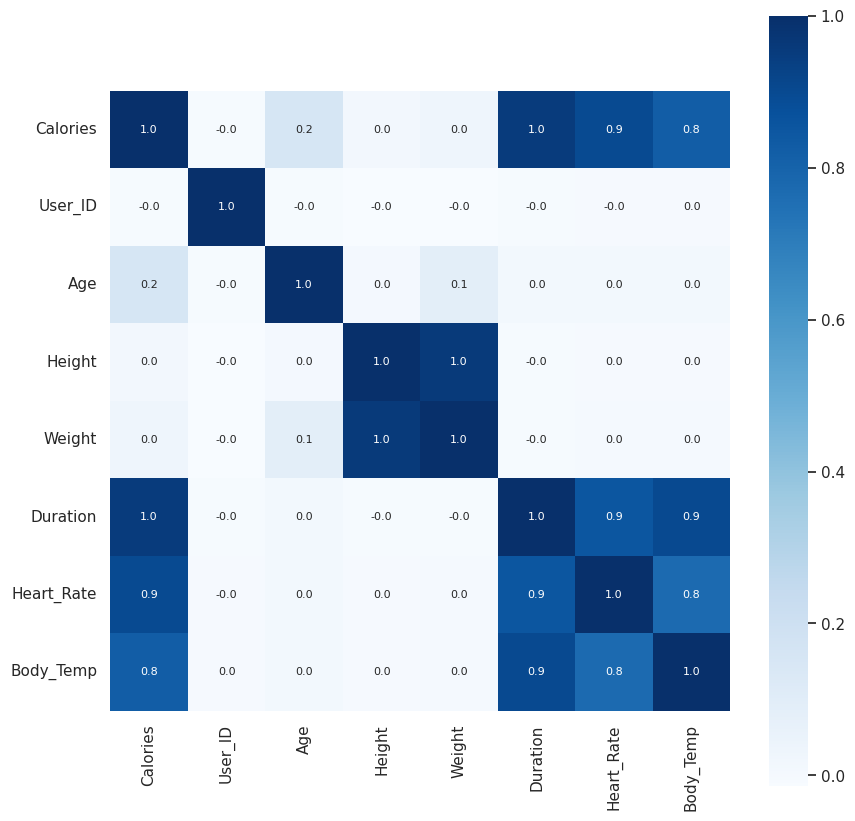

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
# converting the text data to numerical values


In [ ]:
df.replace({'Gender':{'male':0, 'female':1}},inplace=True)

<ipython-input-25-711e70bd8b86>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0, 'female':1}},inplace=True)


In [ ]:
df.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# Separating features and Target

In [ ]:
X = df.drop(columns=['User_ID','Calories'], axis=1)
y = df['Calories']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
# Model Training

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediction on Test data

In [ ]:
test_data_prediction = model.predict(X_test)
test_data_accuracy = metrics.r2_score(y_test, test_data_prediction)

In [ ]:
test_data_accuracy

0.998800624504713